In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
df.dropna(subset=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow'],how='any',inplace=True)

In [7]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
df['RainTomorrow'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
    df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

- COVERTED NULLS AND CLEANED THE DATA SUCCESSFULLY

# TARGET VARIABLE REPRESENTATION

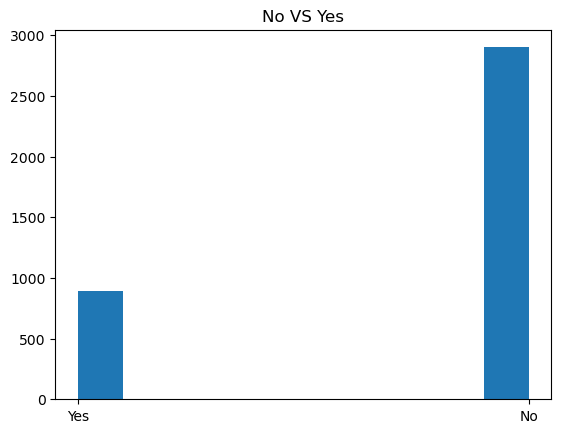

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df["RainTomorrow"].hist(grid=False)
plt.title("No VS Yes")
plt.show()

# LABEL ENCODING

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,0.0,1.0,19.8,27.1,24.4,8.6,9.0,2.0,35.0,12.0,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1.0,1.0
908,1.0,1.0,18.7,25.6,6.8,3.8,3.4,0.0,33.0,12.0,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1.0,1.0
909,2.0,1.0,16.5,25.5,16.8,2.8,6.1,15.0,19.0,15.0,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1.0,0.0
910,3.0,1.0,18.5,26.9,0.0,3.2,11.0,1.0,30.0,12.0,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0.0,0.0
911,4.0,1.0,18.2,28.2,0.0,6.8,9.0,5.0,50.0,6.0,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1276.0,2.0,25.2,34.5,3.0,4.0,9.2,5.0,39.0,3.0,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1.0,0.0
8382,1277.0,2.0,26.2,33.3,0.0,6.0,5.9,3.0,54.0,1.0,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0.0,1.0
8383,1278.0,2.0,24.9,32.8,20.4,6.2,8.7,14.0,37.0,5.0,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1.0,0.0
8384,1279.0,2.0,25.5,33.1,0.0,4.8,7.1,10.0,37.0,0.0,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0.0,0.0


In [14]:
df.RainTomorrow.value_counts()

0.0    2901
1.0     889
Name: RainTomorrow, dtype: int64

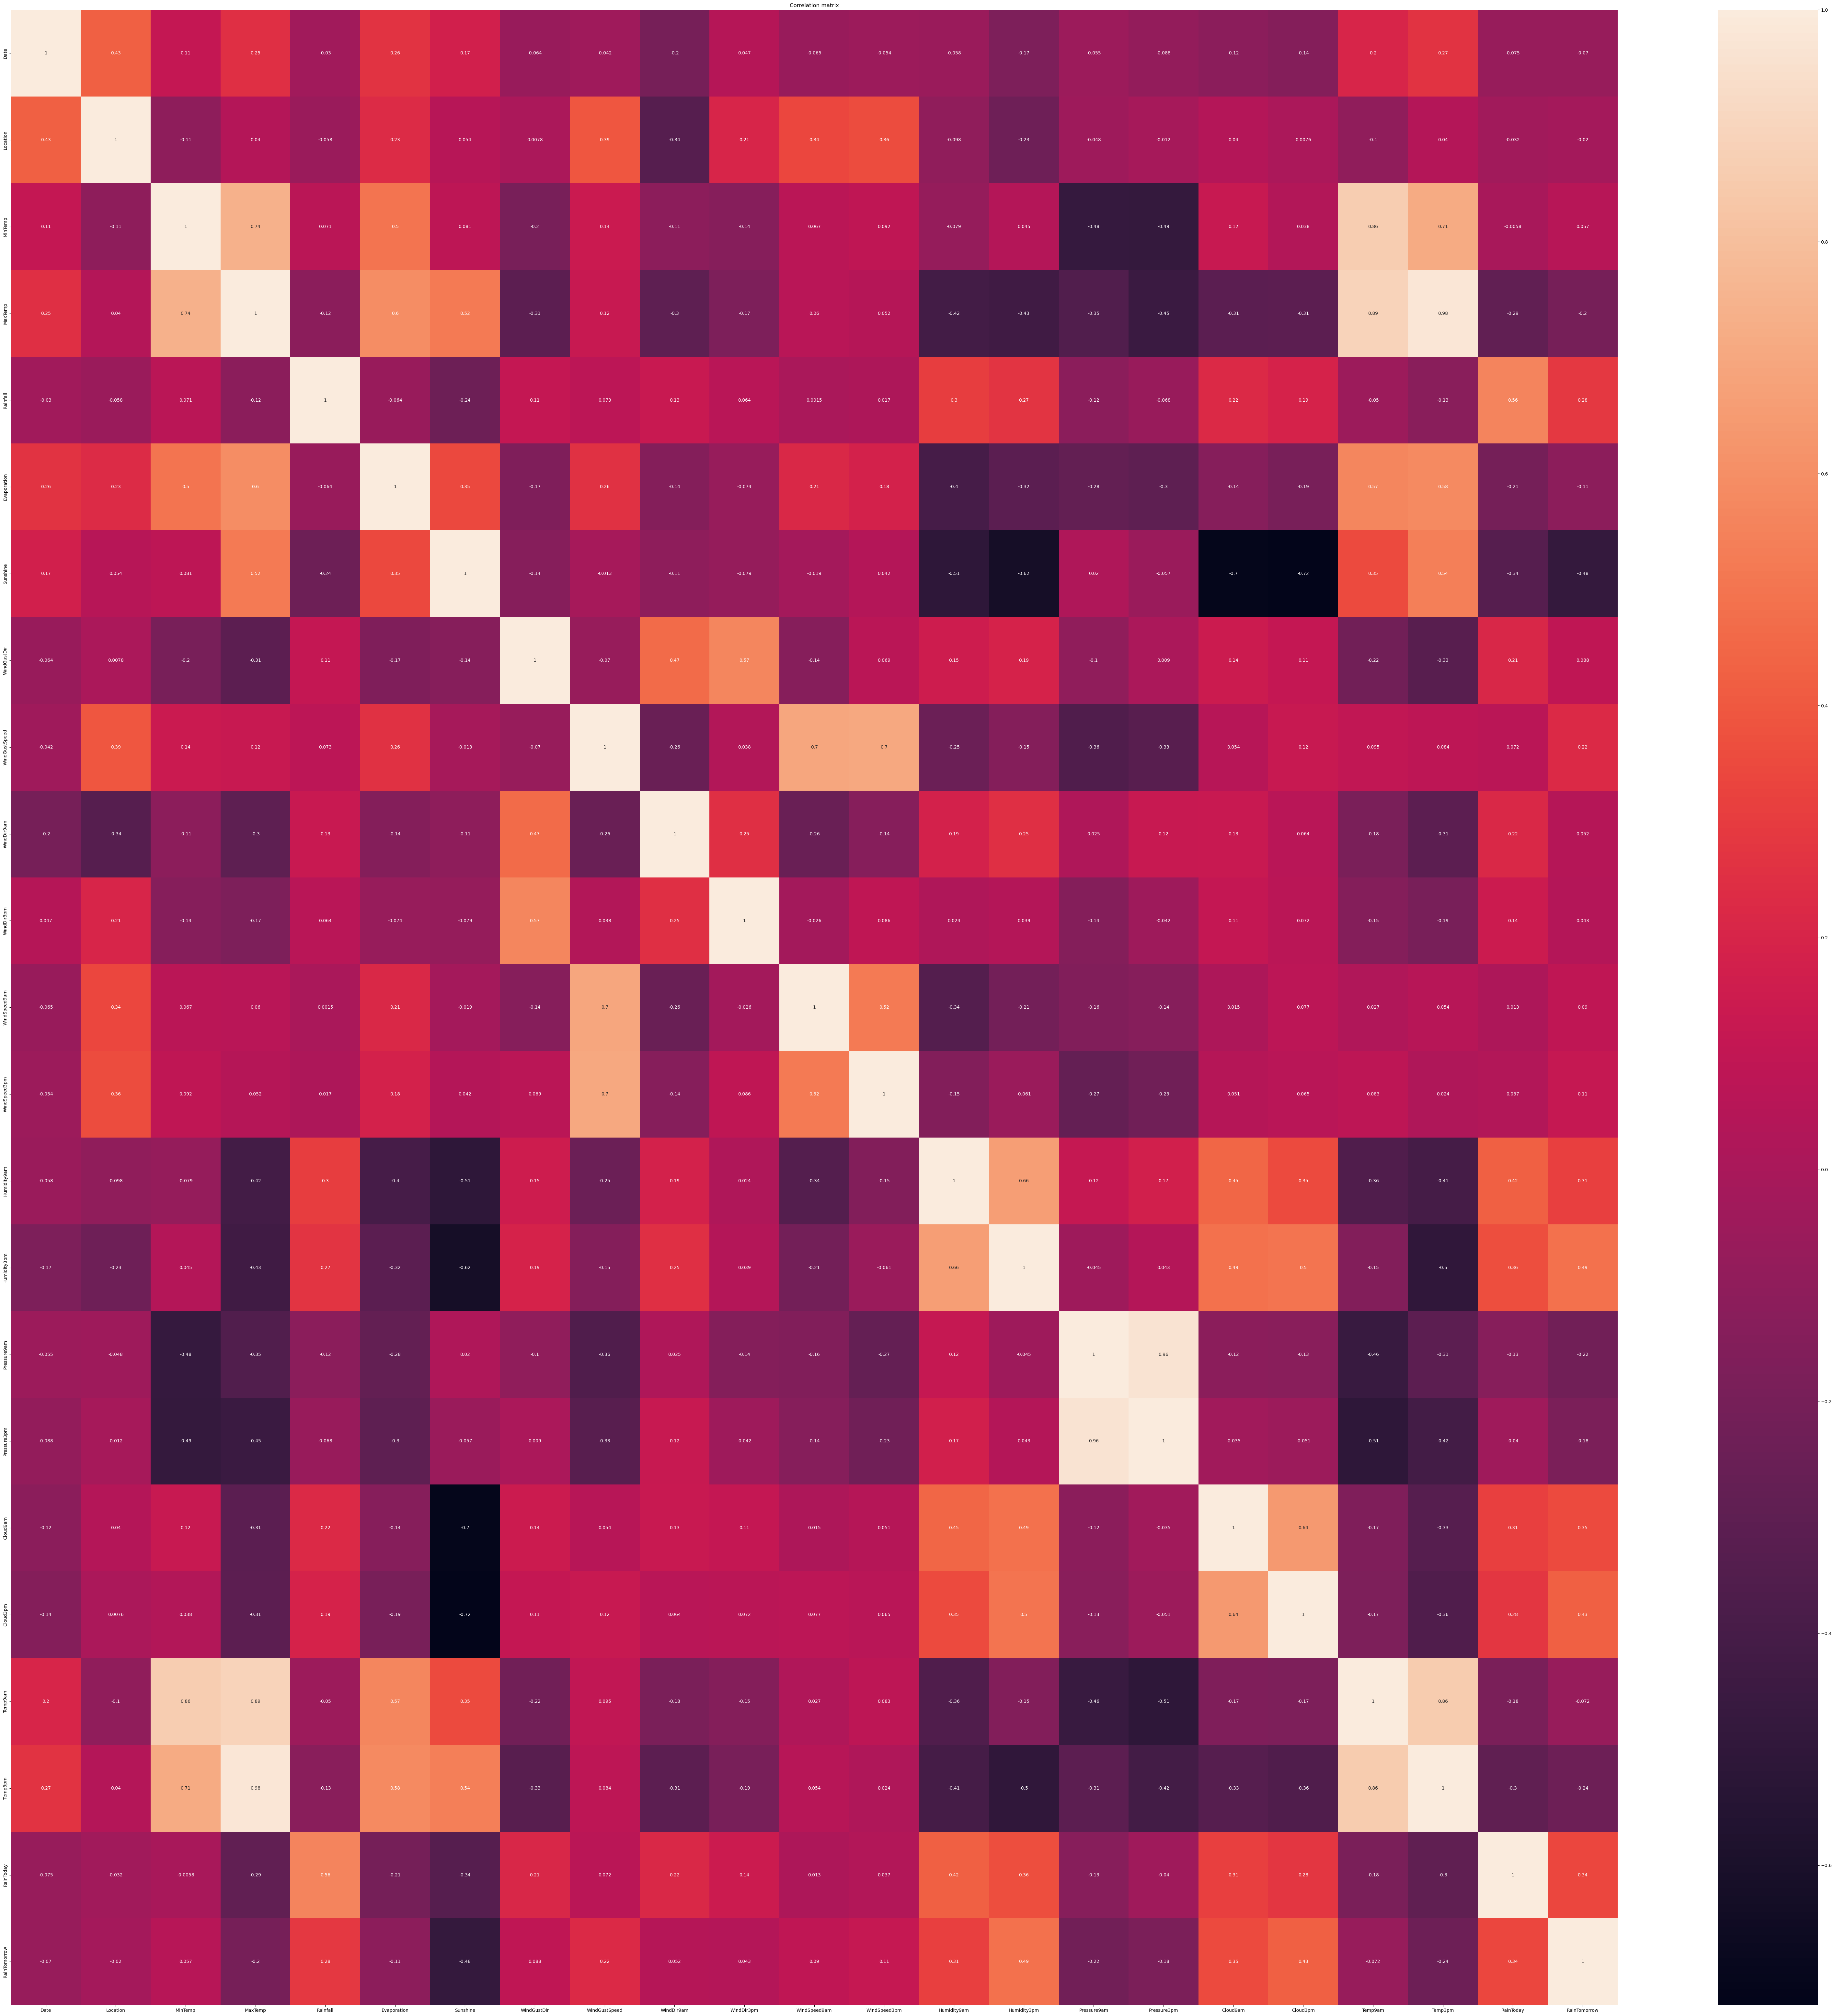

In [15]:
corr_mat=df.corr()
plt.figure(figsize=[80,80])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation matrix")
plt.show()

- IT IS DIFFICULT TO OBSERVE AND ANALYSE THIS HEATMAP 

In [16]:
corr_matrix=df.corr()
corr_matrix["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.488203
Cloud3pm         0.425103
Cloud9am         0.350422
RainToday        0.337225
Humidity9am      0.314470
Rainfall         0.284318
WindGustSpeed    0.220913
WindSpeed3pm     0.113545
WindSpeed9am     0.089924
WindGustDir      0.087582
MinTemp          0.056973
WindDir9am       0.051553
WindDir3pm       0.042865
Location        -0.020422
Date            -0.069712
Temp9am         -0.071768
Evaporation     -0.110534
Pressure3pm     -0.177347
MaxTemp         -0.196455
Pressure9am     -0.220205
Temp3pm         -0.242769
Sunshine        -0.481861
Name: RainTomorrow, dtype: float64

- HERE WE CAN SEE THE HIGHEST AND LOWEST CORRELATION

# CHECKING THE DISTRIBUTION

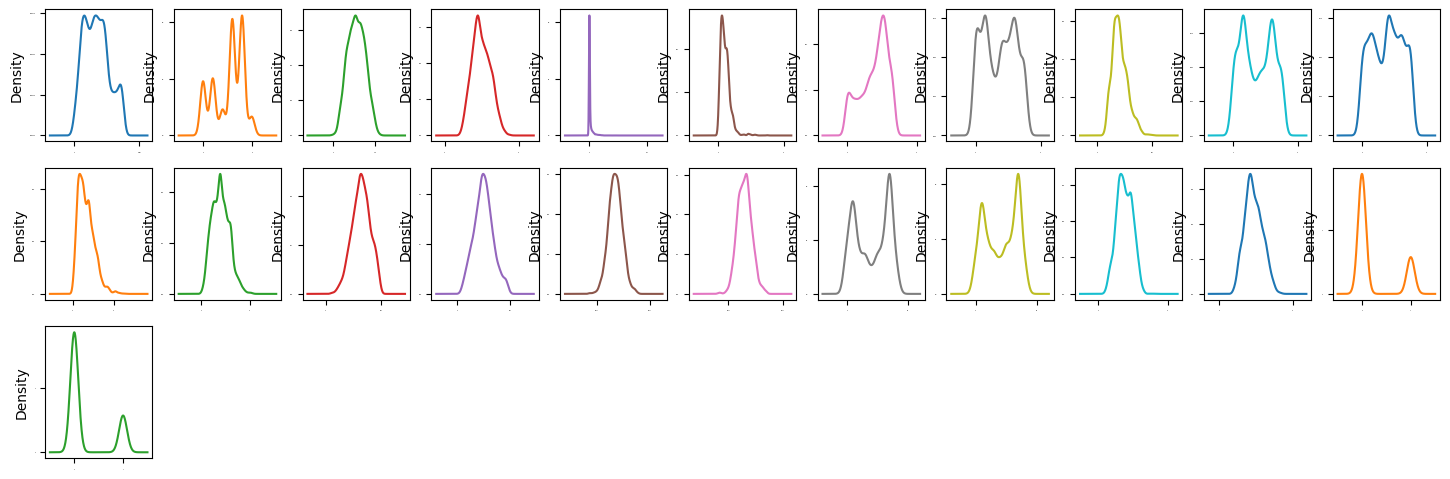

In [17]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

- WE CAN OBSERVE SKEWNESS IN ALMOST ALL THE COLUMNS HENCE WE WILL USE TRANSFORMATION TECHNIQUE TO REMOVE THE SKEWNESS

# PREPROCESSING

In [18]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [19]:
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
907,0.0,1.0,19.8,27.1,24.4,8.6,9.0,2.0,35.0,12.0,...,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1.0
908,1.0,1.0,18.7,25.6,6.8,3.8,3.4,0.0,33.0,12.0,...,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1.0
909,2.0,1.0,16.5,25.5,16.8,2.8,6.1,15.0,19.0,15.0,...,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1.0
910,3.0,1.0,18.5,26.9,0.0,3.2,11.0,1.0,30.0,12.0,...,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0.0
911,4.0,1.0,18.2,28.2,0.0,6.8,9.0,5.0,50.0,6.0,...,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1276.0,2.0,25.2,34.5,3.0,4.0,9.2,5.0,39.0,3.0,...,22.0,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1.0
8382,1277.0,2.0,26.2,33.3,0.0,6.0,5.9,3.0,54.0,1.0,...,13.0,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0.0
8383,1278.0,2.0,24.9,32.8,20.4,6.2,8.7,14.0,37.0,5.0,...,20.0,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1.0
8384,1279.0,2.0,25.5,33.1,0.0,4.8,7.1,10.0,37.0,0.0,...,13.0,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0.0


In [20]:
y

907     1.0
908     1.0
909     0.0
910     0.0
911     1.0
       ... 
8381    0.0
8382    1.0
8383    0.0
8384    0.0
8385    0.0
Name: RainTomorrow, Length: 3790, dtype: float64

In [21]:
x.skew().sort_values(ascending=False)

Rainfall         7.592966
Evaporation      2.114169
RainToday        1.253358
WindSpeed9am     0.935658
WindGustSpeed    0.699143
WindSpeed3pm     0.356434
Date             0.343487
Temp3pm          0.239057
MaxTemp          0.237727
Humidity3pm      0.174915
Pressure3pm      0.096222
MinTemp          0.039516
Pressure9am      0.032381
WindDir9am       0.030790
Temp9am          0.029503
WindGustDir      0.004110
WindDir3pm      -0.054372
Cloud9am        -0.128711
Cloud3pm        -0.155781
Humidity9am     -0.194562
Location        -0.510193
Sunshine        -0.591076
dtype: float64

In [22]:
features=['Rainfall','Evaporation','WindSpeed9am','WindGustSpeed','WindSpeed3pm','Temp3pm','MaxTemp','Humidity3pm']

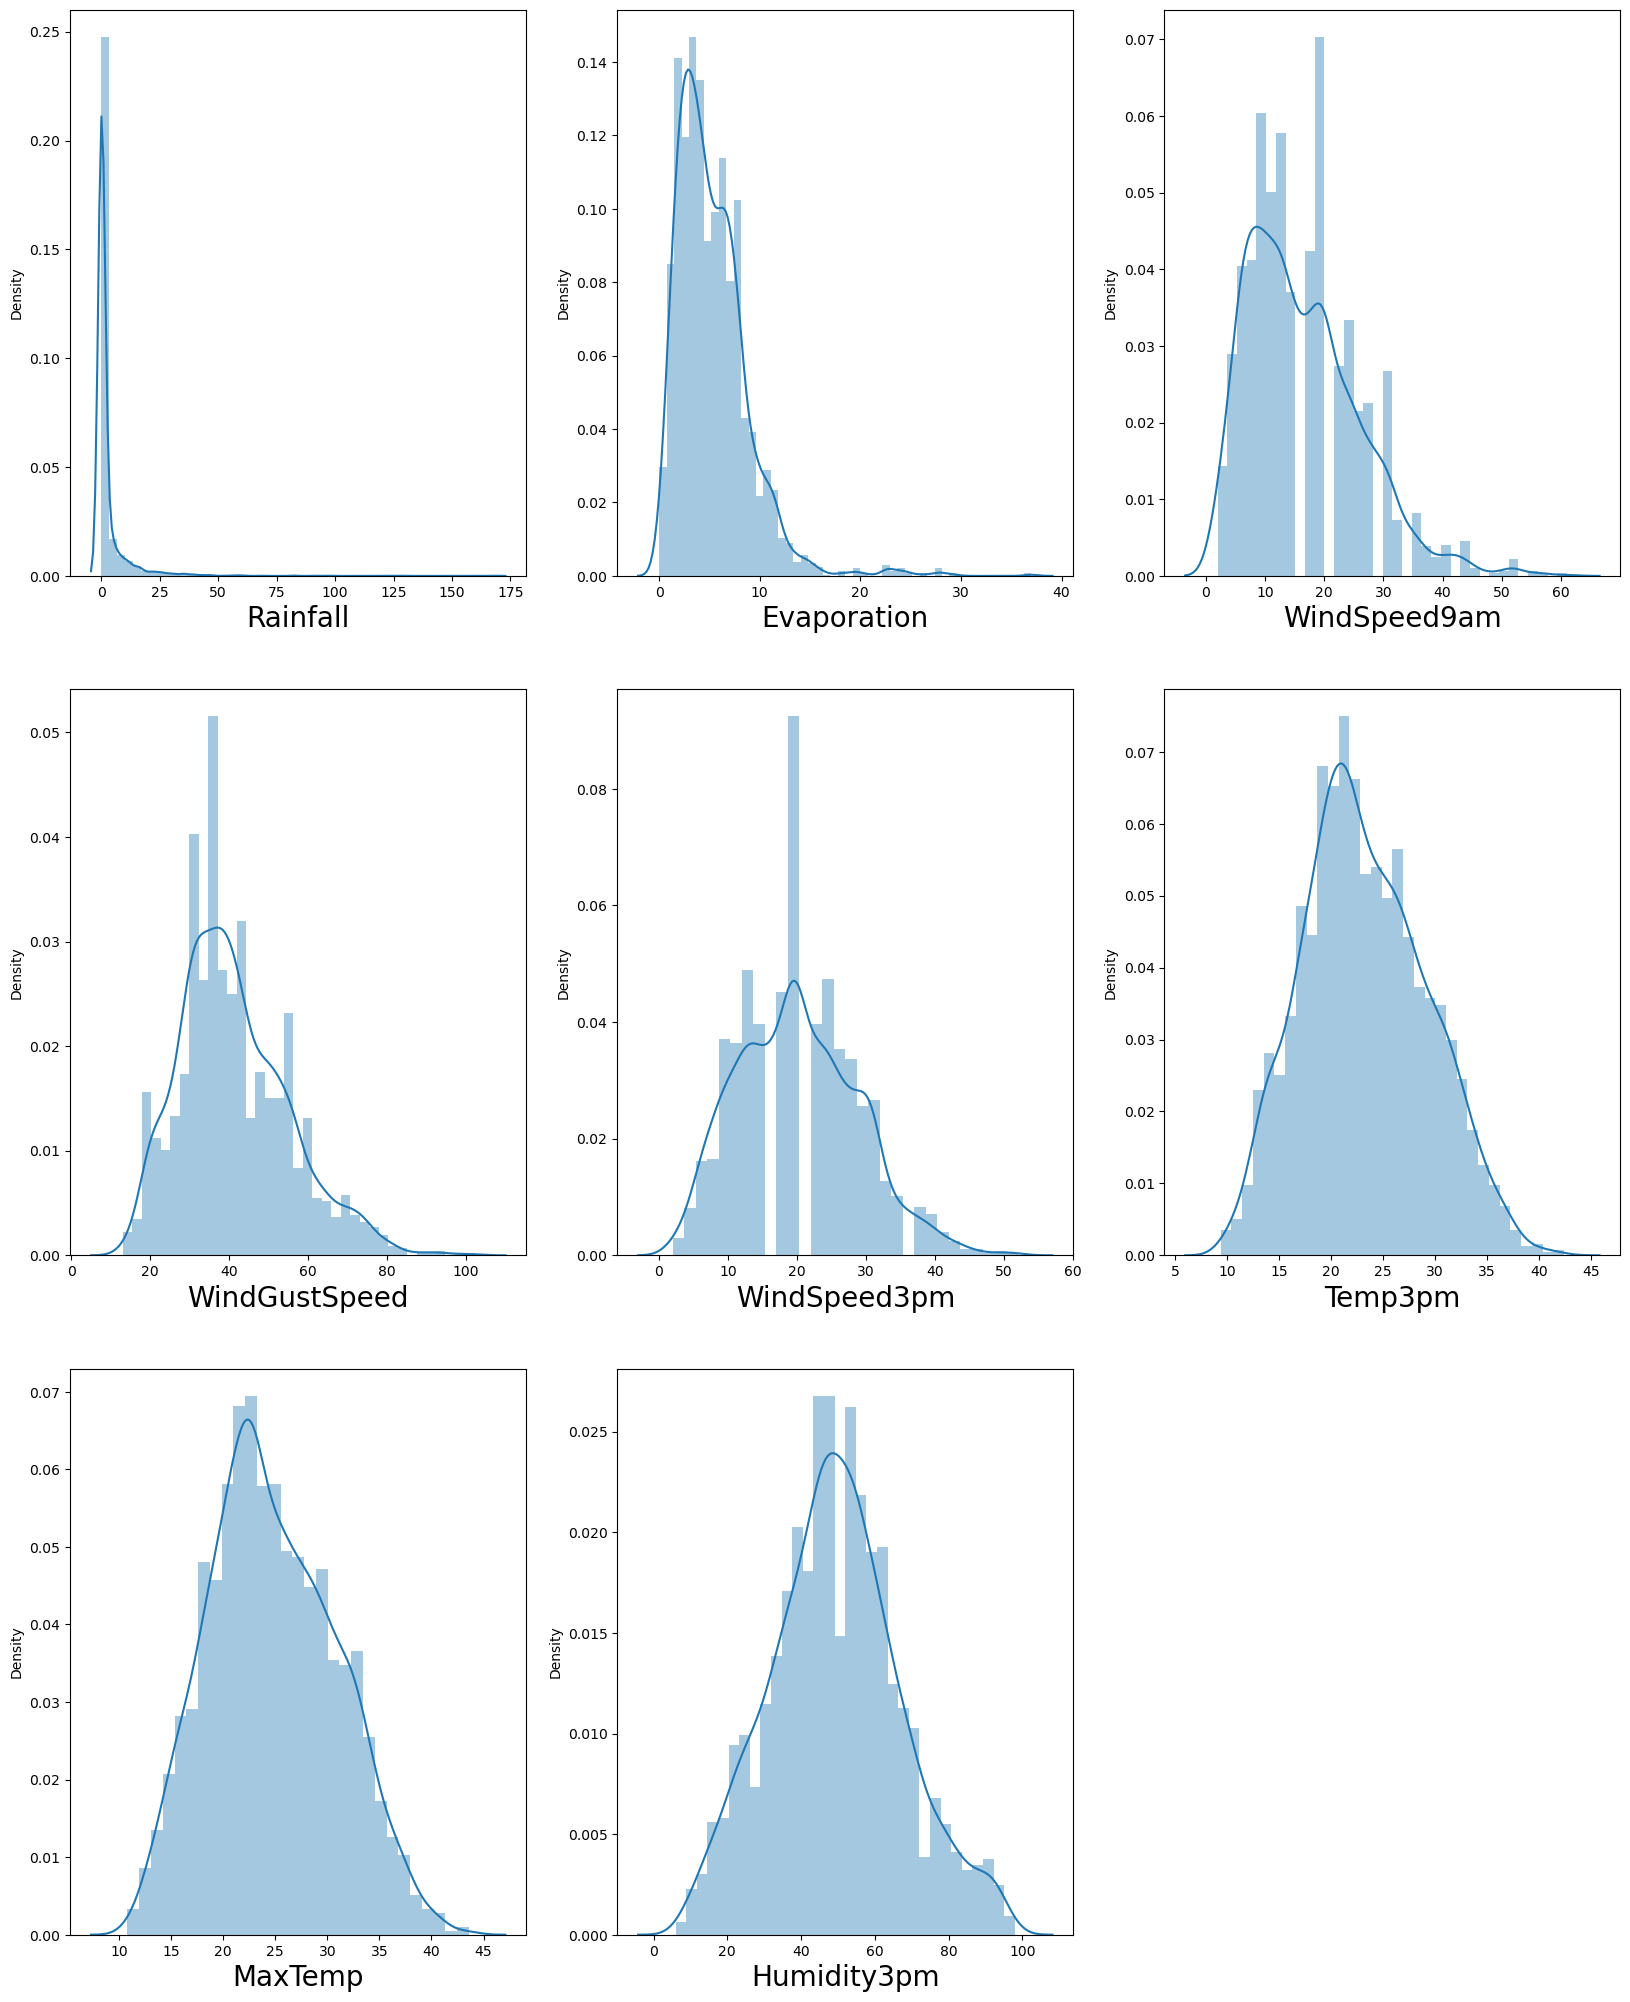

In [23]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df[features]:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [24]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box-cox' or 'yeo-johnson
'''

"\nparameters:\nmethod='box-cox' or 'yeo-johnson\n"

In [25]:
 df[features]=scaler.fit_transform(df[features].values)

In [26]:
df[features]

,Rainfall,Evaporation,WindSpeed9am,WindGustSpeed,WindSpeed3pm,Temp3pm,MaxTemp,Humidity3pm
907,1.890372,1.038631,0.258698,-0.348469,0.292391,0.510371,0.438716,0.616814
908,1.813968,-0.249400,0.258698,-0.516824,-0.777803,-0.341972,0.200269,2.168878
909,1.880119,-0.663414,-1.244917,-1.990583,-1.336806,0.268029,0.184137,0.884438
910,-0.642316,-0.487251,-1.056719,-0.784835,0.070842,0.573939,0.407297,0.616814
911,-0.642316,0.643199,-0.182832,0.720412,1.586041,0.494411,0.609559,1.043080
...,...,...,...,...,...,...,...,...
8381,1.637717,-0.176038,-0.438011,-0.033015,0.292391,1.624413,1.531462,-0.157379
8382,-0.642316,0.440408,-0.182832,0.962188,-0.777803,0.381917,1.362588,2.317946
8383,1.886165,0.492985,-0.182832,-0.187426,0.070842,1.422832,1.291354,0.344816
8384,-0.642316,0.093277,0.546046,-0.187426,-0.777803,1.349887,1.334157,0.508564


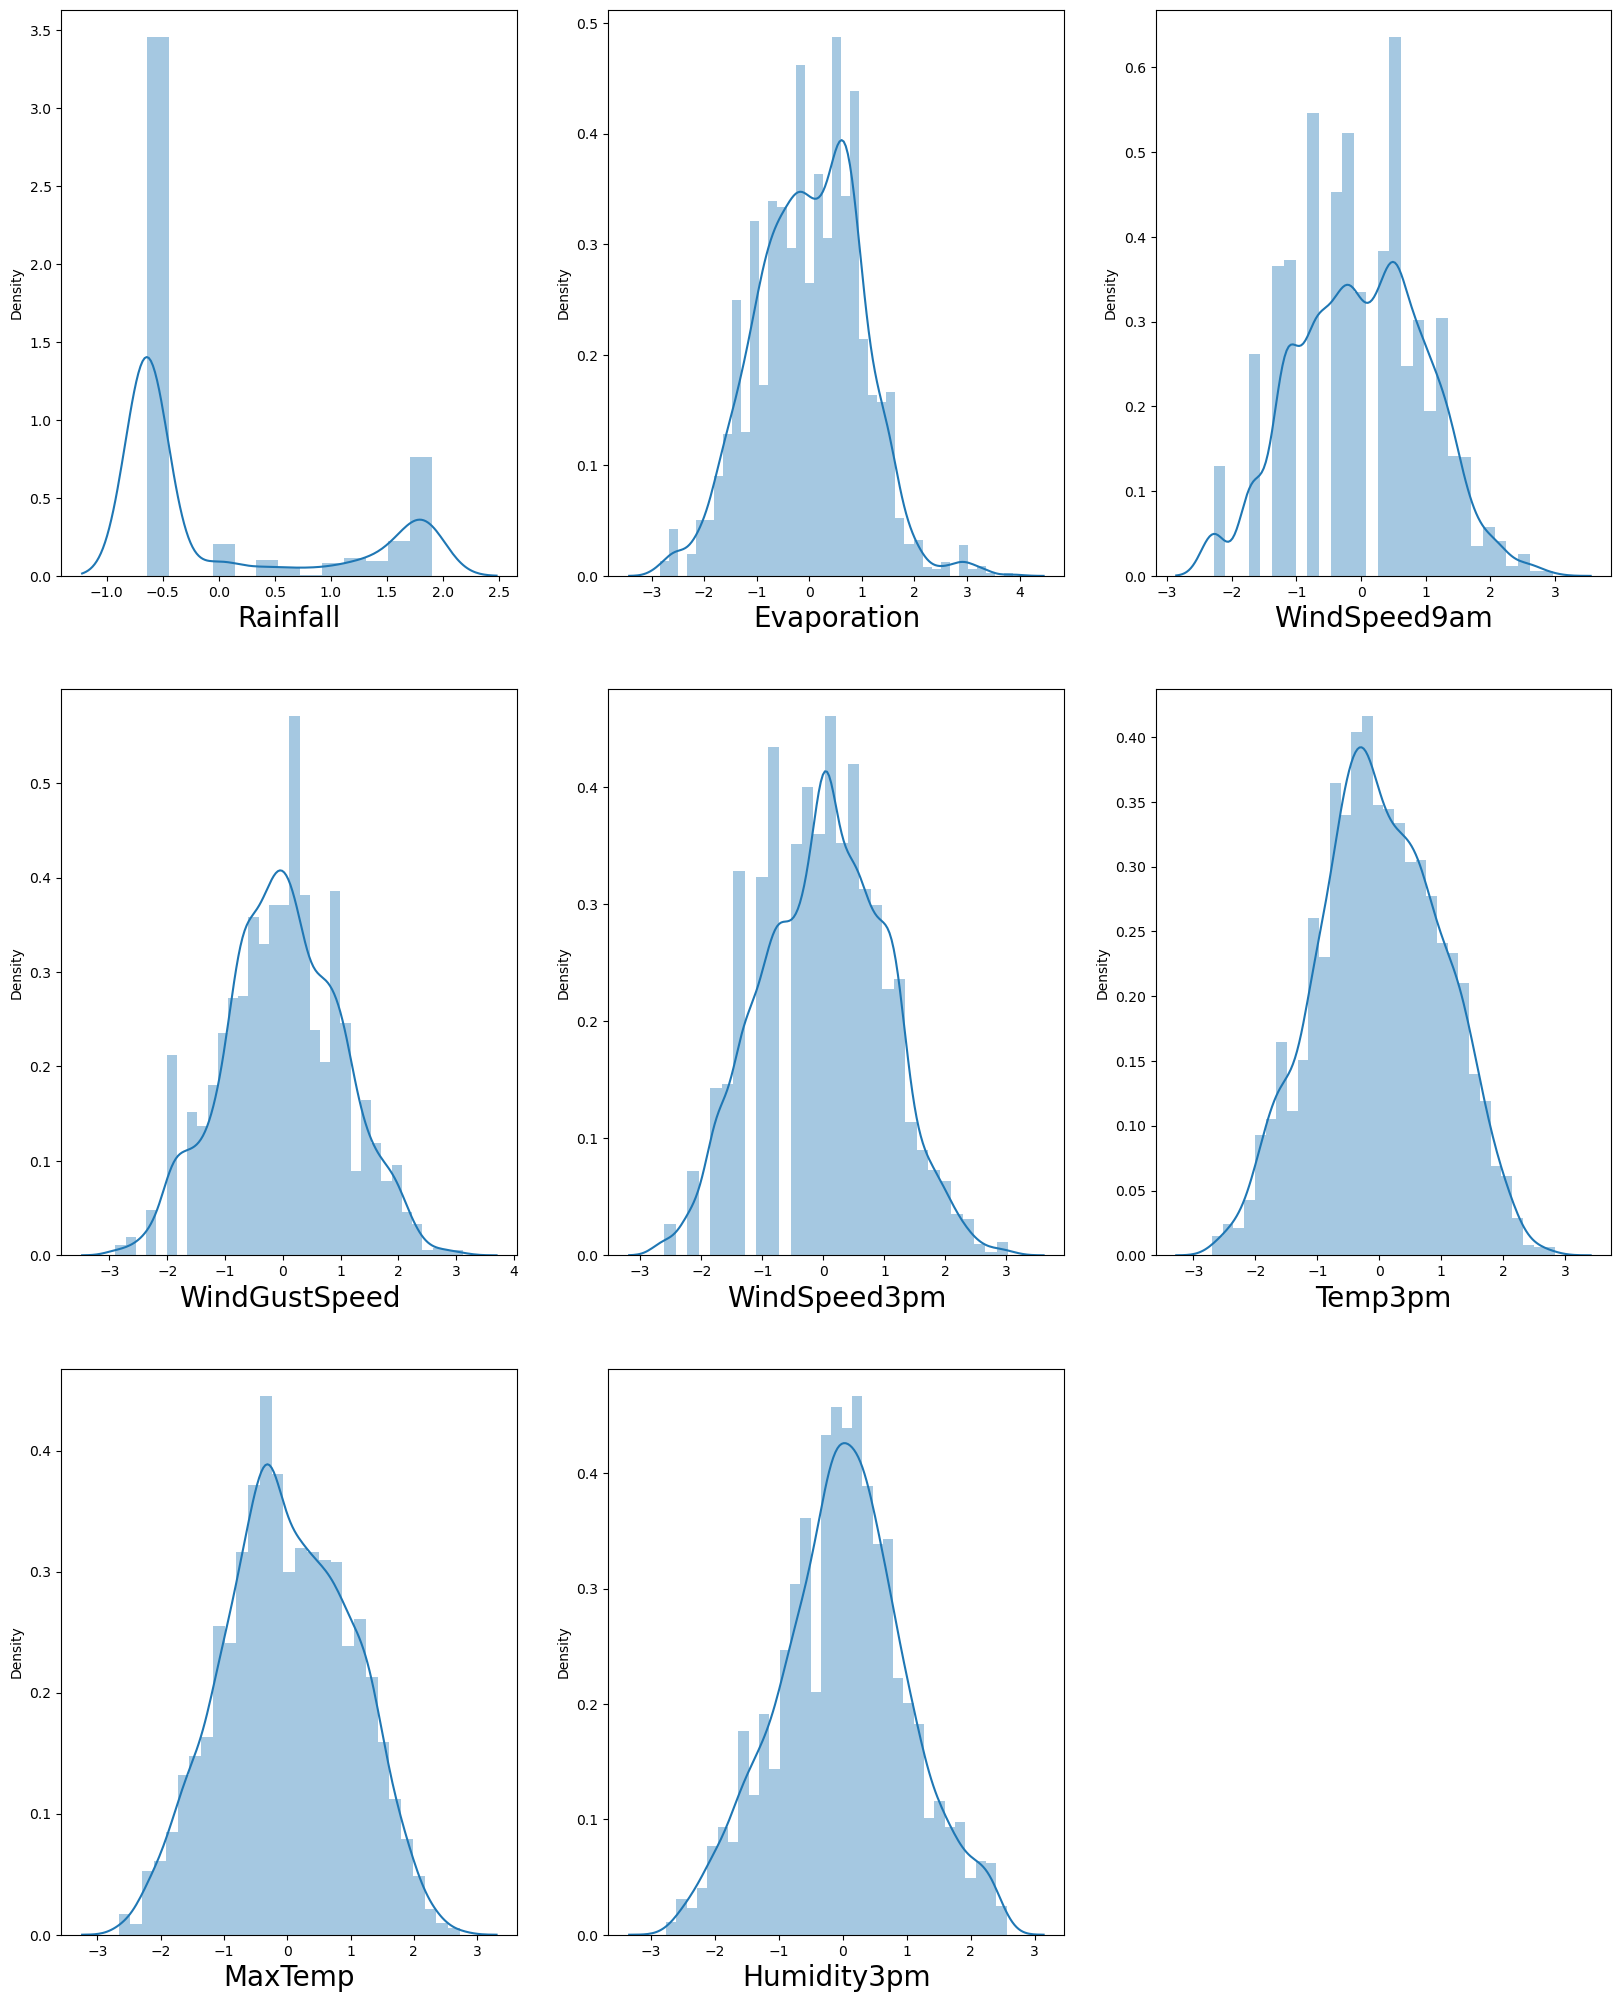

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df[features]:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

- SKEWNESS HAVE BEEN IMPROVED AND HAS BECOME NORMAL DISTRIBUTION

# CHECKING OUTLIERS

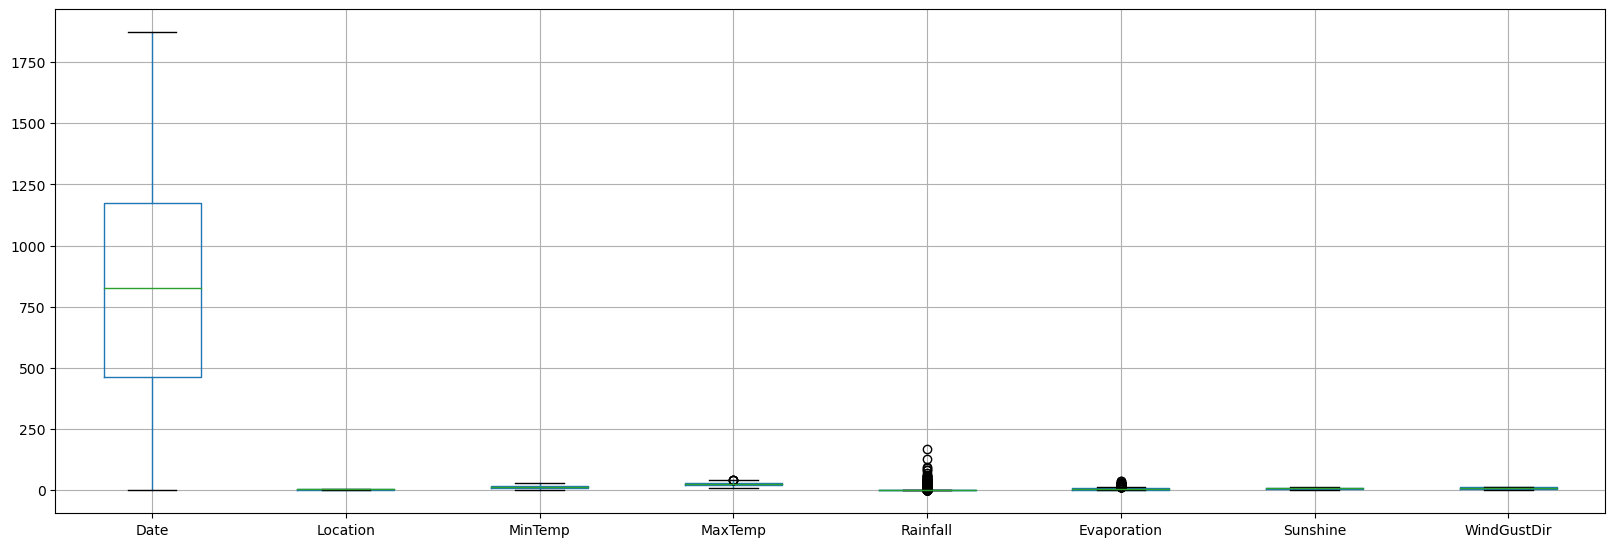

In [28]:
x.iloc[:,0:8].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

- HERE WE CAN NOTICE THAT RAINFALL HAS MORE OUTLIERS AND HIGH SKEWNESS HENCE ITS BEST TO DELETE THE COLUMN 

In [29]:
df=df.drop(["Rainfall"],axis=1)

In [30]:
df

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,0.0,1.0,19.8,0.438716,1.038631,9.0,2.0,-0.348469,12.0,2.0,...,83.0,0.616814,1018.9,1017.9,6.0,6.0,22.0,0.510371,1.0,1.0
908,1.0,1.0,18.7,0.200269,-0.249400,3.4,0.0,-0.516824,12.0,8.0,...,85.0,2.168878,1020.7,1020.1,4.0,7.0,21.0,-0.341972,1.0,1.0
909,2.0,1.0,16.5,0.184137,-0.663414,6.1,15.0,-1.990583,15.0,2.0,...,84.0,0.884438,1021.5,1020.1,5.0,7.0,21.0,0.268029,1.0,0.0
910,3.0,1.0,18.5,0.407297,-0.487251,11.0,1.0,-0.784835,12.0,1.0,...,68.0,0.616814,1018.9,1016.6,2.0,5.0,23.3,0.573939,0.0,0.0
911,4.0,1.0,18.2,0.609559,0.643199,9.0,5.0,0.720412,6.0,4.0,...,67.0,1.043080,1016.3,1012.8,1.0,1.0,24.0,0.494411,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1276.0,2.0,25.2,1.531462,-0.176038,9.2,5.0,-0.033015,3.0,5.0,...,66.0,-0.157379,1011.3,1007.9,7.0,7.0,29.6,1.624413,1.0,0.0
8382,1277.0,2.0,26.2,1.362588,0.440408,5.9,3.0,0.962188,1.0,0.0,...,66.0,2.317946,1010.4,1006.8,4.0,8.0,30.2,0.381917,0.0,1.0
8383,1278.0,2.0,24.9,1.291354,0.492985,8.7,14.0,-0.187426,5.0,7.0,...,72.0,0.344816,1009.9,1006.2,4.0,6.0,29.5,1.422832,1.0,0.0
8384,1279.0,2.0,25.5,1.334157,0.093277,7.1,10.0,-0.187426,0.0,15.0,...,62.0,0.508564,1011.1,1006.9,7.0,7.0,28.6,1.349887,0.0,0.0


In [31]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all().all()

False

<AxesSubplot:xlabel='Evaporation'>

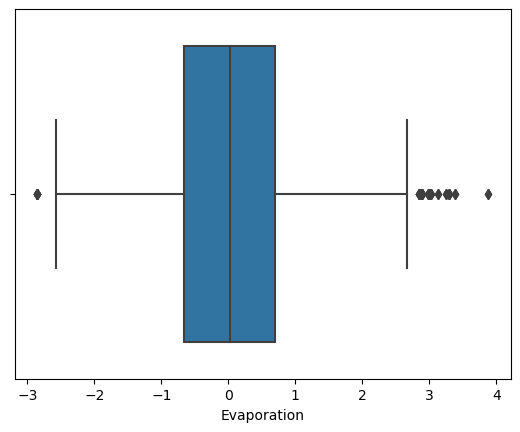

In [32]:
sns.boxplot(df['Evaporation'])

In [33]:
upper_limit=df['Evaporation'].mean() + 3*df['Evaporation'].std()
lower_limit=df['Evaporation'].mean() - 3*df['Evaporation'].std()
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 3.0003958567015863
lower_limit: -3.0003958567015863


- finding the outliers

In [34]:
df.loc[(df['Evaporation'] > upper_limit)| (df['Evaporation'] < lower_limit)]

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2855,1798.0,5.0,17.7,-0.297701,3.290857,4.3,0.0,-0.516824,1.0,0.0,...,51.0,0.179324,1019.3,1016.1,7.0,8.0,21.4,-0.202644,0.0,0.0
2863,1802.0,5.0,16.8,0.578739,3.023928,12.7,1.0,-0.033015,12.0,2.0,...,74.0,0.616814,1012.4,1008.9,4.0,1.0,22.1,0.414198,0.0,0.0
2877,1809.0,5.0,13.6,1.176275,3.881191,12.9,0.0,0.115349,14.0,0.0,...,64.0,-0.386554,1015.8,1012.3,5.0,1.0,23.1,1.172679,0.0,0.0
2891,1814.0,5.0,16.3,-0.178803,3.290857,7.0,8.0,0.327651,10.0,8.0,...,63.0,0.344816,1022.6,1022.2,7.0,7.0,19.2,-0.254623,0.0,0.0
2905,1820.0,5.0,17.3,1.724916,3.007253,10.5,12.0,-0.033015,6.0,7.0,...,74.0,-0.679069,1014.4,1010.3,0.0,1.0,24.0,1.808236,0.0,0.0
2911,1823.0,5.0,16.9,-0.145148,3.245869,7.1,8.0,-0.516824,15.0,10.0,...,93.0,1.043080,1024.9,1022.3,7.0,5.0,17.7,-0.065562,1.0,1.0
2947,1841.0,5.0,18.5,0.822410,3.137483,10.0,9.0,-0.348469,4.0,2.0,...,77.0,0.344816,1025.1,1022.2,1.0,1.0,24.6,0.885565,0.0,0.0
2961,1848.0,5.0,18.4,1.248360,3.378379,10.8,0.0,-0.187426,7.0,1.0,...,75.0,-0.157379,1022.1,1018.2,1.0,1.0,23.4,1.232091,0.0,0.0
3707,1798.0,5.0,17.7,-0.297701,3.290857,4.3,0.0,-0.516824,1.0,0.0,...,51.0,0.179324,1019.3,1016.1,7.0,8.0,21.4,-0.202644,0.0,0.0
3715,1802.0,5.0,16.8,0.578739,3.023928,12.7,1.0,-0.033015,12.0,2.0,...,74.0,0.616814,1012.4,1008.9,4.0,1.0,22.1,0.414198,0.0,0.0


In [35]:
#TRIMING THE DATA
new_df=df.loc[(df['Evaporation']<upper_limit)& (df['Evaporation']>lower_limit)]
print('before removing outlier :',len(df))
print('after removing outlier :',len(new_df))
print('outliers:',len(df)-len(new_df))


before removing outlier : 3790
after removing outlier : 3774
outliers: 16


<AxesSubplot:xlabel='Evaporation'>

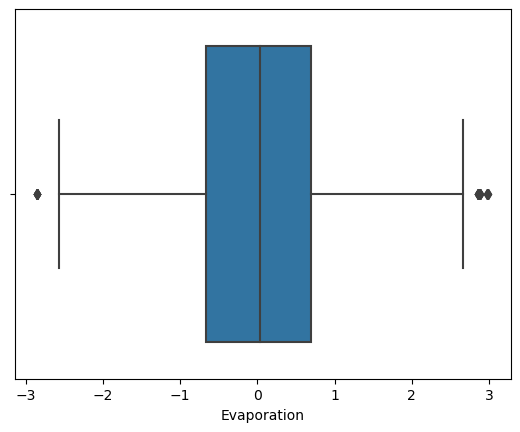

In [36]:
sns.boxplot(new_df['Evaporation'])

In [37]:
# NOW WE CAN SEE THE OUTLIERS HAS BEEN REDUCED AND PUSHED 

In [38]:
new_df=df.copy()
new_df.loc[new_df['Evaporation']>upper_limit,'Evaporation']=upper_limit
new_df.loc[new_df['Evaporation']<lower_limit,'Evaporation']=lower_limit

<AxesSubplot:xlabel='Evaporation'>

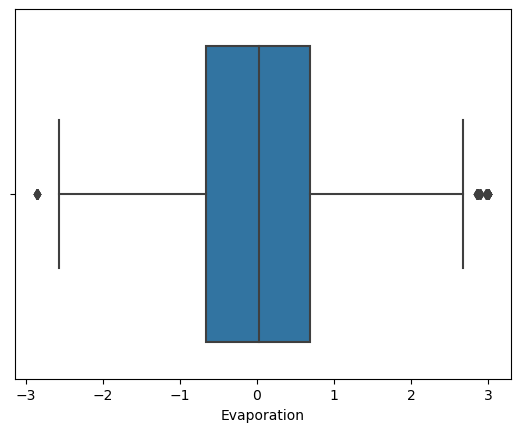

In [39]:
sns.boxplot(new_df['Evaporation'])

In [40]:
#capped data sucessfully

In [41]:
len(new_df)

3790

# TRAINING PROCESS BEGINS

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score


In [43]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('testing accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

testing accuracy 0.8469656992084432 random_state 1
max_accuracy 0.8469656992084432 max_random_state 1
testing accuracy 0.8522427440633246 random_state 2
max_accuracy 0.8522427440633246 max_random_state 2
testing accuracy 0.8614775725593667 random_state 3
max_accuracy 0.8614775725593667 max_random_state 3
testing accuracy 0.8522427440633246 random_state 4
testing accuracy 0.8588390501319261 random_state 5
testing accuracy 0.8456464379947229 random_state 6
testing accuracy 0.8496042216358839 random_state 7
testing accuracy 0.8456464379947229 random_state 8
testing accuracy 0.841688654353562 random_state 9
testing accuracy 0.8298153034300791 random_state 10
testing accuracy 0.8496042216358839 random_state 11
testing accuracy 0.862796833773087 random_state 12
max_accuracy 0.862796833773087 max_random_state 12
testing accuracy 0.8337730870712401 random_state 13
testing accuracy 0.8482849604221636 random_state 14
testing accuracy 0.8350923482849604 random_state 15
testing accuracy 0.84960422

In [44]:
print("Best Accuracy is ",maxAccu,"on random_state",maxRS)

Best Accuracy is  0.8786279683377308 on random_state 149


- NEXT STEP IS TO PASS THIS VALUE AS THE VALUE OF RANDOM STATE AND MAKE THE SPLIT

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 83.64116094986808
[[545  34]
 [ 90  89]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       579
         1.0       0.72      0.50      0.59       179

    accuracy                           0.84       758
   macro avg       0.79      0.72      0.74       758
weighted avg       0.83      0.84      0.83       758



In [48]:
#OBJECT MEANS STRING VALUES AND FLOAT IS POINT VALUES 

-DECISION TREE CLASSIFIER

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=LR.predict(x_test)
pred_train_dtc=dt.predict(x_train)
print("Testiing Accuracy",accuracy_score(y_test,preddt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Testiing Accuracy 83.64116094986808
Training Accuracy 100.0
Accuracy 83.64116094986808
[[545  34]
 [ 90  89]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       579
         1.0       0.72      0.50      0.59       179

    accuracy                           0.84       758
   macro avg       0.79      0.72      0.74       758
weighted avg       0.83      0.84      0.83       758



-RANDOMFORESTCLASSIFIER

In [57]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=200)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 89.84168865435356
[[560  19]
 [ 58 121]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       579
         1.0       0.86      0.68      0.76       179

    accuracy                           0.90       758
   macro avg       0.89      0.82      0.85       758
weighted avg       0.90      0.90      0.89       758



- HERE ITS NOTICABLE THAT RANDOMFORESTCLASSIFIER BRINGS OUT THE BEST SCORE 

# HYPERPARAMETER TUNNING

In [52]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [53]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=7,
                scoring="accuracy")

In [55]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [56]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [58]:
RandomForestClassifier()

RandomForestClassifier()

In [59]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200)

In [61]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8720316622691293

# ROC AUC PLOT

Text(0.5, 1.0, 'ROC AUCplot')

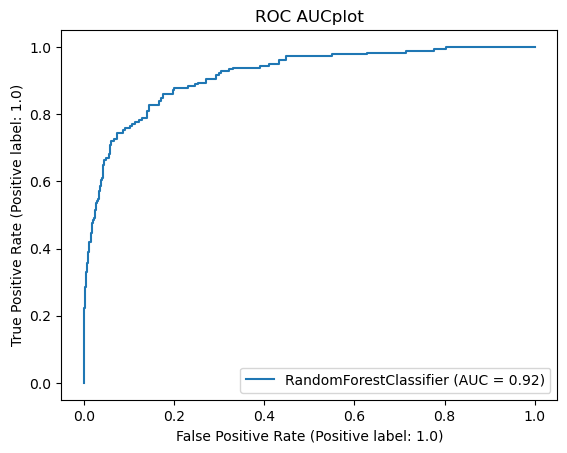

In [62]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUCplot")

# SAVING THE MODEL

In [64]:
import joblib 
joblib.dump(GCV.best_estimator_,"weatherAUS")

['weatherAUS']

In [65]:
saving=10